### Import libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Đọc dữ liệu

In [83]:
dataset_path = './data/titanic_modified_dataset.csv'
df = pd.read_csv(
    dataset_path,
    index_col='PassengerId'
)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
 7   Title     891 non-null    int64  
 8   Survived  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


### Chia biến X, y

In [85]:
x = df.drop(columns=['Survived'])
y = df['Survived']

### Thêm bias vào X

### Chia tập train, val, test

In [86]:
test_size = 0.125
val_size = 0.2
random_state = 2
is_shuffle = True
x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=val_size, random_state=2, shuffle=is_shuffle)

x_train, x_test, y_train, y_test = train_test_split(
    x_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)

In [87]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
621,3,0,27.0,1,0,14.4542,1,0
391,1,0,36.0,1,2,120.0000,0,0
423,3,0,29.0,0,0,7.8750,0,0
53,1,1,49.0,1,0,76.7292,1,1
843,1,1,30.0,0,0,31.0000,1,2


### Chuẩn hóa dữ liệu

In [88]:
discrete_features = ['Pclass', 'Sex', 'SibSp',
                     'Parch', 'Embarked', 'Title']

discrete_train = x_train.loc[:, x_train.columns.isin(discrete_features)].to_numpy()
discrete_val = x_val.loc[:, x_val.columns.isin(discrete_features)].to_numpy()
discrete_test = x_test.loc[:, x_test.columns.isin(
    discrete_features)].to_numpy()


continuous_train = x_train.loc[:, ~x_train.columns.isin(discrete_features)]
continuous_val = x_val.loc[:, ~x_val.columns.isin(discrete_features)]
continuous_test = x_test.loc[:, ~x_test.columns.isin(discrete_features)]

In [89]:
scaler = StandardScaler()
continuous_train = scaler.fit_transform(continuous_train)
continuous_val = scaler.transform(continuous_val)
continuous_test = scaler.transform(continuous_test)

In [90]:
x_train_normalized = np.concatenate([continuous_train, discrete_train], axis=1)
x_val_normalized = np.concatenate([continuous_val, discrete_val], axis=1)
x_test_normalized = np.concatenate([continuous_test, discrete_test], axis=1)

In [91]:
length_train = x_train_normalized.shape[0]
length_val = x_val_normalized.shape[0]
length_test = x_test_normalized.shape[0]


x_train_b = np.hstack((np.ones((length_train, 1)), x_train_normalized))
x_val_b = np.hstack((np.ones((length_val, 1)), x_val_normalized))
x_test_b = np.hstack((np.ones((length_test, 1)), x_test_normalized))

In [92]:
x_train_b

array([[ 1.        , -0.20525287, -0.34812766, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  0.49488575,  1.76556546, ...,  2.        ,
         0.        ,  0.        ],
       [ 1.        , -0.04966651, -0.47988477, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.12745969, -0.48238806, ...,  0.        ,
         2.        ,  0.        ],
       [ 1.        ,  0.26150621, -0.22655193, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -1.99449602, -0.05432564, ...,  1.        ,
         2.        ,  3.        ]])

### Cài đặt các hàm quan trọng

np.clip(array, min_value, max_value), trong đó:

- array là mảng cần giới hạn giá trị.
- min_value là giá trị nhỏ nhất mà phần tử của mảng có thể có.
- max_value là giá trị lớn nhất mà phần tử của mảng có thể có.

In [93]:
import numpy as np

def predict(theta, x):
    z = np.dot(x, theta)
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    L = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return round(L, 3)

def compute_gradient(x, y_hat, y):
    gradient = np.dot(x.T, (y_hat - y)) / len(y)
    return np.round(gradient, 3)  # Làm tròn từng phần tử của gradient

def update_parameters(theta, lr, gradient):
    new_theta = theta - lr * gradient
    return np.round(new_theta, 3)  # Làm tròn từng phần tử của theta mới

def compute_accuracy(x, y, theta):
    label = predict(theta, x).round()
    acc = (label == y).mean()
    return round(acc, 3)

### Khai báo các siêu tham số và khởi tạo weights

In [94]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(1)
# uniform random từ 0 - 1
theta = np.random.uniform(
    size=x_train_b.shape[1]
)

### Huấn luyện mô hình

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []


for epoch in range(epochs):
    accuracy_batch_val = []
    accuracy_batch_train = []
    loss_batch_val = []
    loss_batch_train = []
    for i in range(0, x_train_b.shape[0], batch_size):
        x_batch_train = x_train_b[i:i + batch_size]
        y_batch_train = y_train[i:i + batch_size]

        y_hat = predict(theta=theta, x=x_batch_train)
        gradient = compute_gradient(x_batch_train, y_hat, y_batch_train)
        theta = update_parameters(theta, lr, gradient)

        loss_batch_train.append(compute_loss(y_hat, y_batch_train))
        accuracy_batch_train.append(compute_accuracy(x_train_b, y_train, theta))

        y_hat_val = predict(theta=theta, x=x_val_b)
        loss_batch_val.append(compute_loss(y_hat_val, y_val))
        accuracy_batch_val.append(compute_accuracy(x_val_b, y_val, theta))

    train_batch_loss = sum(loss_batch_train) / len(loss_batch_train)
    val_batch_loss = sum(loss_batch_val) / len(loss_batch_val)
    train_batch_acc = sum(accuracy_batch_train) / len(accuracy_batch_train)
    val_batch_acc = sum(accuracy_batch_val) / len(accuracy_batch_val)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    
    if epoch >= 90:
        print(
            f"\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}")

        


EPOCH 91:	Training loss: 0.430	Validation loss: 0.534

EPOCH 92:	Training loss: 0.430	Validation loss: 0.533

EPOCH 93:	Training loss: 0.429	Validation loss: 0.533

EPOCH 94:	Training loss: 0.429	Validation loss: 0.533

EPOCH 95:	Training loss: 0.429	Validation loss: 0.533

EPOCH 96:	Training loss: 0.429	Validation loss: 0.533

EPOCH 97:	Training loss: 0.429	Validation loss: 0.533

EPOCH 98:	Training loss: 0.428	Validation loss: 0.533

EPOCH 99:	Training loss: 0.428	Validation loss: 0.533

EPOCH 100:	Training loss: 0.428	Validation loss: 0.533


### Đánh giá mô hình

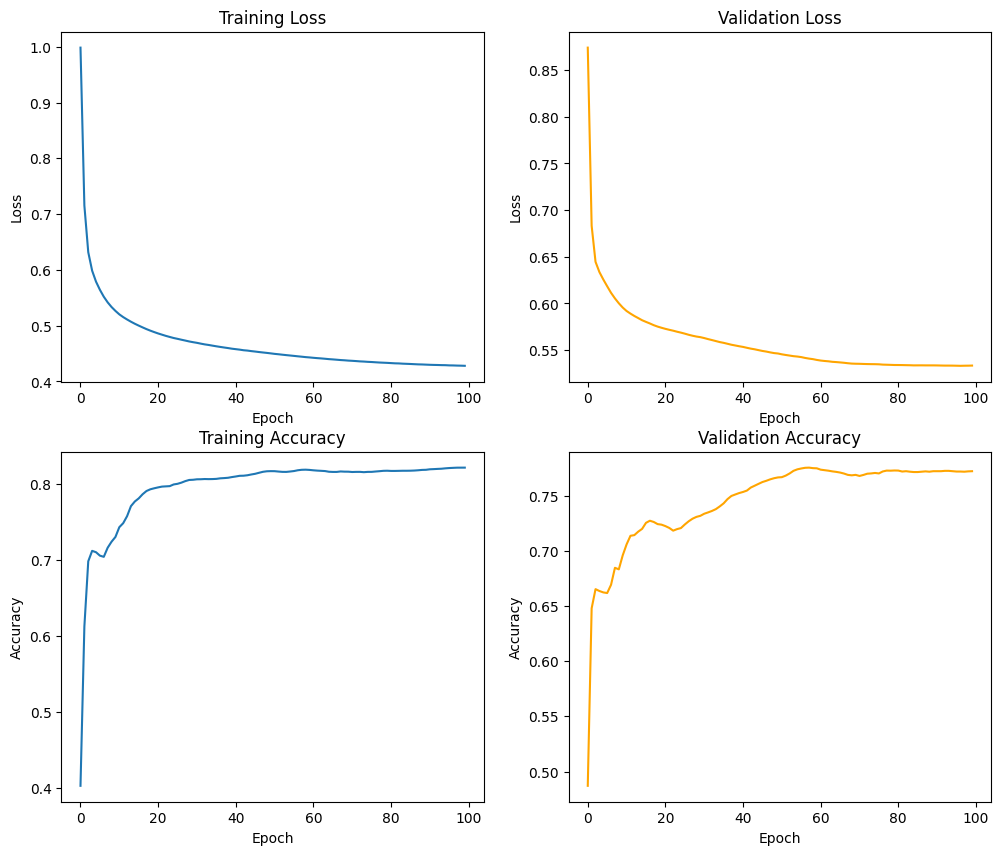

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()


In [97]:
val_set_acc = compute_accuracy(x_val_b, y_val, theta)
test_set_acc = compute_accuracy(x_test_b, y_test, theta)
print('Evaluation on validation and test set:')
print(f'Accuracy on validation set: {val_set_acc}')
print(f'Accuracy on test set: {test_set_acc}')

Evaluation on validation and test set:
Accuracy on validation set: 0.777
Accuracy on test set: 0.798
